# Nhập môn học máy và khai phá dữ liệu: Hệ Thống Recommend Nhạc

## 1. Giới thiệu

- Trong nghiên cứu này, nhóm sẽ tìm hiểu và phát triển một hệ thống recommend nhạc. Mục tiêu là tạo ra một hệ thống có khả năng dự đoán sở thích âm nhạc của người dùng và đề xuất các bài hát phù hợp.

## 2. Phương Pháp

### 2.1 Thu thập và tiền xử lý dữ liệu
#### 1. Dữ liệu về danh sách nghệ sĩ và danh sách các bài bài hát
   - Crawl từ trang [Last.fm](last.fm).
   - Kết hợp với dataset từ kaggle [Spotify Audio Feature](https://www.kaggle.com/datasets/tomigelo/spotify-audio-features)
   - Sử dụng API của spotify để thêm các trường dữ liệu thiếu vào dataset

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import json
warnings.filterwarnings("ignore")

In [25]:
raw_df = pd.read_csv('./crawl/phase 2/merge_data/song_data.csv')
df = pd.read_csv('./handle/song_data.csv')

In [27]:
raw_df

,title,artist,area,youtube_link,spotify_link,release_date,youtube_view_count,youtube_like_count,tag,duration,...,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,tle
0,Stop For A Minute,"""#Botsu""",JP,https://www.youtube.com/watch?v=zI9C9j0QgU4,NaN,NaN,14025554.0,82830.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(darude) sandstorm (original mix)[www homeofmu...,"""#Botsu""",JP,https://www.youtube.com/watch?v=61-PXrbs4MA,2lylyZl9S7rbp2FUP5IS0r,NaN,4811528.0,44569.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20 Titelnummer 20,"""#Botsu""",JP,https://www.youtube.com/watch?v=4aM5RYx3-LU,NaN,NaN,5.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,The Shirelles - Mamma Said,"""#Botsu""",JP,https://www.youtube.com/watch?v=L842mz-tNBQ,NaN,NaN,4316508.0,51113.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Thaw,"""#Botsu""",JP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2854944,Unsui,大谷幸,JP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2854945,Rhythm Emotion Pure,大谷幸,JP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2854946,"Requiem, Softly",大谷幸,JP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2854947,廃虚の門番 〜巨像との戦い〜,大谷幸,JP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.head()

,title,artist,area,youtube_link,spotify_link,youtube_view_count,youtube_like_count,acousticness,danceability,duration_ms,...,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,(darude) sandstorm (original mix)[www homeofmu...,"""#Botsu""",JP,https://www.youtube.com/watch?v=61-PXrbs4MA,2lylyZl9S7rbp2FUP5IS0r,4811528.0,44569.0,0.0157,0.518,229573.0,...,0.989000,4.0,0.0328,-7.130,0.0,0.0434,136.033,4.0,0.498,NaN
1,Llanero Soy,"""El Cholo"" Valderrama",Latin,NaN,6SNhaFcUsQ6T0pr65YvxZ1,NaN,NaN,0.5100,0.581,143173.0,...,0.000000,4.0,0.2060,-8.977,0.0,0.0406,80.031,4.0,0.970,NaN
2,Mi Catira,"""El Cholo"" Valderrama",Latin,NaN,2p6kHZpmuTuWWDNhOLYgAB,NaN,NaN,0.8700,0.623,155093.0,...,0.000047,11.0,0.0770,-11.680,1.0,0.0369,111.139,3.0,0.934,NaN
3,Paisanos Cuando Yo Muera,"""El Cholo"" Valderrama",Latin,NaN,07YOIYrEQvnS6RiQ3dScVk,NaN,NaN,0.8810,0.708,167600.0,...,0.000031,9.0,0.0887,-12.691,1.0,0.0446,98.679,3.0,0.955,NaN
4,El Verso Me Identifica,"""El Cholo"" Valderrama",Latin,NaN,3PQtsXDJK1qgiNWT5uSOts,NaN,NaN,0.5570,0.372,224573.0,...,0.000013,11.0,0.0705,-9.741,1.0,0.0367,81.686,4.0,0.938,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391969 entries, 0 to 391968
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   title               391968 non-null  object 
 1   artist              391969 non-null  object 
 2   area                300535 non-null  object 
 3   youtube_link        205903 non-null  object 
 4   spotify_link        391969 non-null  object 
 5   youtube_view_count  191230 non-null  float64
 6   youtube_like_count  190452 non-null  float64
 7   acousticness        391969 non-null  float64
 8   danceability        391969 non-null  float64
 9   duration_ms         391969 non-null  float64
 10  energy              391969 non-null  float64
 11  instrumentalness    391969 non-null  float64
 12  key                 391969 non-null  float64
 13  liveness            391969 non-null  float64
 14  loudness            391969 non-null  float64
 15  mode                391969 non-nul

### Giải thích các trường thông tin
- **artist**: Tên của nghệ sĩ hoặc nhóm nhạc.
- **title**: Tên bài hát.
- **youtube_link**: link youtube của bài hát hoặc mv bài hát 
- **spotify_link**: id trên spotify của bài hát
- **youtube_view_count**: số lượt xem của bài hát trên youtube
- **youtube_like_count**: số like của bài hát trên youtube
- **acousticness**: Thước đo độ tin cậy từ 0,0 đến 1,0 cho biết bản nhạc có phải là bản nhạc acoustic hay không. 1.0 thể hiện độ tin cậy cao rằng bản nhạc đó là bản nhạc acoustic.
- **danceability**: Khả năng khiêu vũ mô tả mức độ phù hợp của một bản nhạc để khiêu vũ dựa trên sự kết hợp của các yếu tố âm nhạc bao gồm nhịp độ, độ ổn định nhịp điệu, cường độ nhịp và tính đều đặn tổng thể. Giá trị 0,0 là khả năng khiêu vũ ít nhất và 1,0 là khả năng khiêu vũ cao nhất.
- **duration_ms**: Thời lượng của bản nhạc tính bằng mili giây.
- **energy**: Năng lượng là thước đo từ 0,0 đến 1,0 và thể hiện thước đo cảm nhận về cường độ và hoạt động.
- **instrumentalness**: Dự đoán xem một bản nhạc có chứa giọng hát hay không. Âm thanh "Ooh" và "aah" được coi là nhạc cụ trong ngữ cảnh này. Các bản nhạc rap hoặc lời nói rõ ràng là "giọng hát". Giá trị nhạc cụ càng gần 1.0 thì nhiều khả năng bản nhạc không chứa nội dung giọng hát. Các giá trị trên 0,5 nhằm mục đích thể hiện các bản nhạc không lời nhưng độ tin cậy sẽ cao hơn khi giá trị tiến tới 1,0.
- **key**: Khóa của bản nhạc. Các số nguyên ánh xạ tới các cao độ bằng cách sử dụng ký hiệu Lớp cao độ tiêu chuẩn. Ví dụ: 0 = C, 1 = C♯/D♭, 2 = D, v.v. Nếu không biết khóa nào, giá trị là -1.
- **liveness**: Phát hiện sự hiện diện của khán giả trong bản ghi. Giá trị độ sống động cao hơn thể hiện khả năng bản nhạc được biểu diễn trực tiếp cao hơn. Giá trị trên 0,8 cho thấy khả năng cao là bản nhạc đang hoạt động.
- **loudness**: Độ ồn tổng thể của một bản nhạc tính bằng decibel (dB). Giá trị âm lượng được tính trung bình trên toàn bộ bản nhạc và rất hữu ích để so sánh độ ồn tương đối của các bản nhạc. Độ ồn là chất lượng của âm thanh là mối tương quan tâm lý chính của thể chất cường độ (biên độ). Giá trị thường nằm trong khoảng từ -60 đến 0 db.
- **mode**: Mode biểu thị thể thức (trưởng hoặc thứ) của một bản nhạc, loại thang âm mà nội dung giai điệu của nó bắt nguồn từ đó, trưởng được biểu thị bằng 1 và thứ là 0.
- **speechiness**: Khả năng nói phát hiện sự hiện diện của các từ được nói trong một bản nhạc. Bản ghi âm càng giống giọng nói (ví dụ: chương trình trò chuyện, sách nói, thơ), giá trị thuộc tính càng gần 1,0. Các giá trị trên 0,66 mô tả các bản nhạc được có thể được làm hoàn toàn bằng lời nói. Các giá trị trong khoảng 0,33 đến 0,66 mô tả các bản nhạc có thể chứa cả nhạc và lời nói, theo từng phần hoặc theo lớp, bao gồm cả các trường hợp như nhạc rap. Các giá trị dưới 0,33 rất có thể đại diện cho âm nhạc và các thứ không phải khác những bài hát giống như lời nói.
- **tempo**: Nhịp độ ước tính tổng thể của một bản nhạc tính bằng nhịp mỗi phút (BPM). Trong thuật ngữ âm nhạc, nhịp độ là tốc độ hoặc nhịp độ của một bản nhạc nhất định và được tính trực tiếp từ thời lượng nhịp trung bình.
- **time_signature**: Số chỉ nhịp là dấu hiệu giúp bạn biết bản nhạc đó có nhịp bao nhiêu, nhịp 2, nhịp 3 hay nhịp 4.
- **valence**: Thang đo từ 0,0 đến 1,0 mô tả tính tích cực của âm nhạc được truyền tải bởi một bản nhạc. Các bản nhạc có hóa trị cao nghe có vẻ tích cực hơn (ví dụ: vui vẻ, vui vẻ, hưng phấn), trong khi các bản nhạc có hóa trị thấp có âm thanh tiêu cực hơn (ví dụ: buồn, chán nản, tức giận) .
- **popularity**: Giá trị càng cao thì bài hát càng phổ biến.

In [12]:
df.isnull().sum()

title                      1
artist                     0
area                   91434
youtube_link          186066
spotify_link               0
youtube_view_count    200739
youtube_like_count    201517
acousticness               0
danceability               0
duration_ms                0
energy                     0
instrumentalness           0
key                        0
liveness                   0
loudness                   0
mode                       0
speechiness                0
tempo                      0
time_signature             0
valence                    0
popularity            261643
dtype: int64

In [13]:
df.describe()

,youtube_view_count,youtube_like_count,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
count,1.912300e+05,1.904520e+05,391969.000000,391969.000000,3.919690e+05,391969.000000,391969.000000,391969.000000,391969.000000,391969.000000,391969.000000,391969.000000,391969.000000,391969.00000,391969.000000,130326.000000
mean,6.676344e+06,5.410138e+04,0.340909,0.559927,2.241891e+05,0.597182,0.169615,5.249767,0.211625,-9.412873,0.651256,0.089831,120.721990,3.88097,0.505941,24.130573
std,6.253296e+07,4.240678e+05,0.338549,0.178285,1.128200e+05,0.254491,0.319161,3.550446,0.191305,5.568629,0.476574,0.108865,29.917071,0.46704,0.265837,19.662458
min,0.000000e+00,0.000000e+00,0.000000,0.000000,1.068000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,7.632000e+03,6.700000e+01,0.028000,0.440000,1.710000e+05,0.420000,0.000000,2.000000,0.096300,-11.566000,0.000000,0.035600,97.989000,4.00000,0.291000,7.000000
50%,4.796100e+04,4.160000e+02,0.212000,0.573000,2.103720e+05,0.631000,0.000113,5.000000,0.131000,-7.994000,1.000000,0.048200,120.006000,4.00000,0.505000,21.000000
75%,3.681922e+05,3.621000e+03,0.641000,0.694000,2.563870e+05,0.810000,0.092700,8.000000,0.269000,-5.662000,1.000000,0.086500,139.373000,4.00000,0.725000,38.000000
max,3.751435e+09,2.460759e+07,0.996000,0.996000,5.610020e+06,1.000000,1.000000,11.000000,1.000000,3.251000,1.000000,0.966000,249.983000,5.00000,1.000000,100.000000


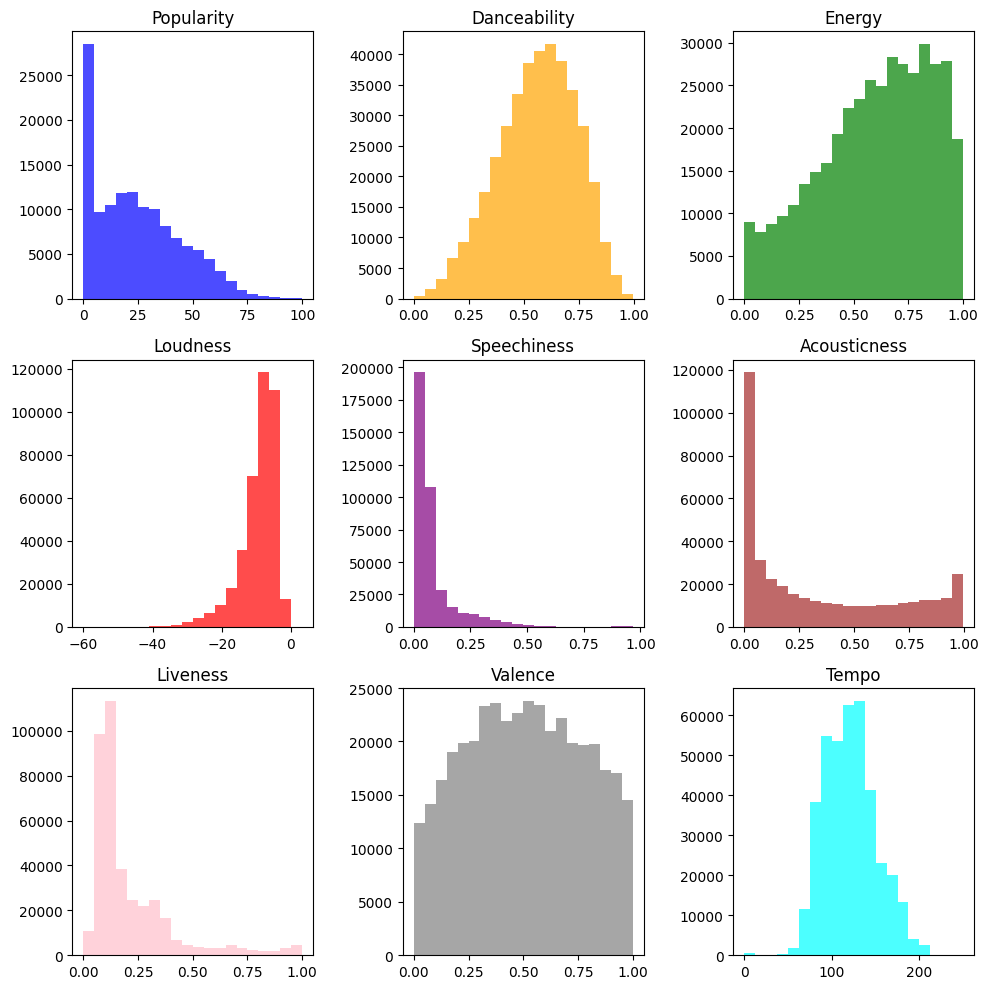

In [16]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
axs[0, 0].hist(df['popularity'], bins=20, color='blue', alpha=0.7)
axs[0, 0].set_title('Popularity')
axs[0, 1].hist(df['danceability'], bins=20, color='orange', alpha=0.7)
axs[0, 1].set_title('Danceability')
axs[0, 2].hist(df['energy'], bins=20, color='green', alpha=0.7)
axs[0, 2].set_title('Energy')
axs[1, 0].hist(df['loudness'], bins=20, color='red', alpha=0.7)
axs[1, 0].set_title('Loudness')
axs[1, 1].hist(df['speechiness'], bins=20, color='purple', alpha=0.7)
axs[1, 1].set_title('Speechiness')
axs[1, 2].hist(df['acousticness'], bins=20, color='brown', alpha=0.7)
axs[1, 2].set_title('Acousticness')
axs[2, 0].hist(df['liveness'], bins=20, color='pink', alpha=0.7)
axs[2, 0].set_title('Liveness')
axs[2, 1].hist(df['valence'], bins=20, color='gray', alpha=0.7)
axs[2, 1].set_title('Valence')
axs[2, 2].hist(df['tempo'], bins=20, color='cyan', alpha=0.7)
axs[2, 2].set_title('Tempo')
plt.tight_layout()
plt.show()

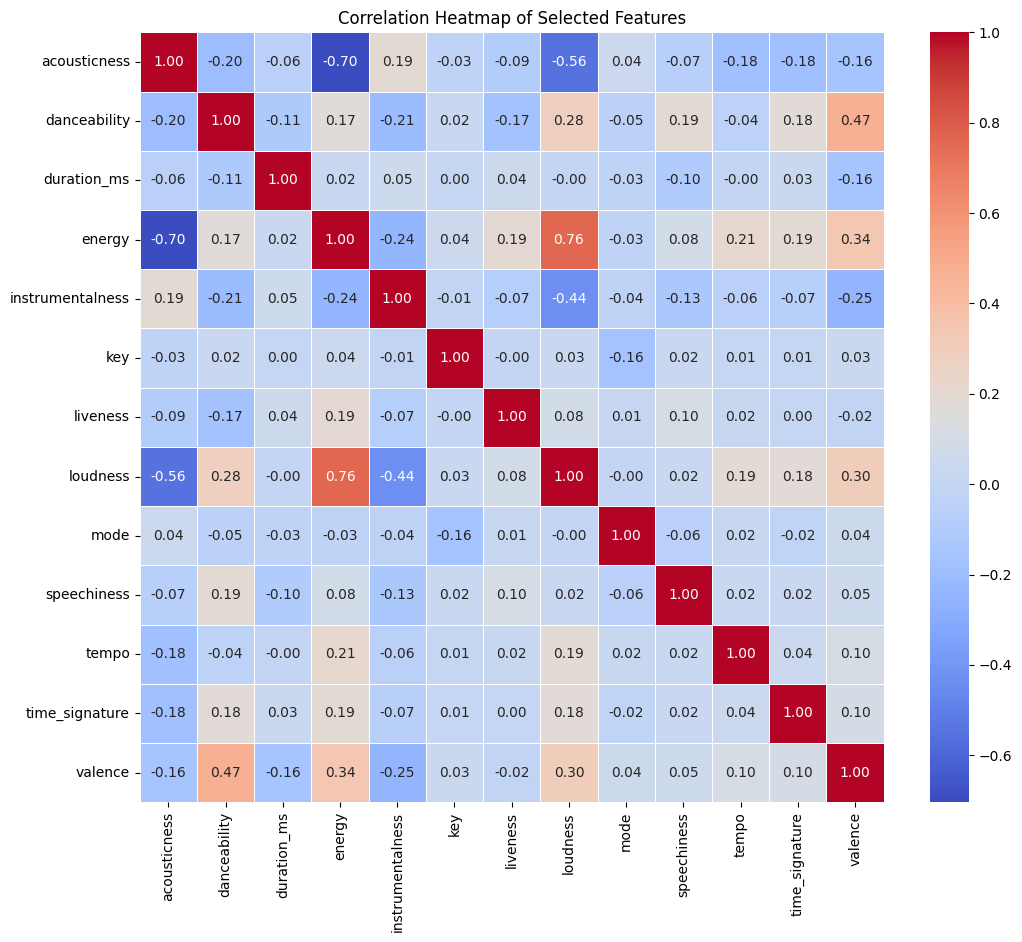

In [22]:
selected_features = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']
selected_df = df[selected_features]
correlation_matrix = selected_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()

#### 2.2 Dữ liệu playlist
- Danh sách playlist được lấy từ [Spotify Million Playlist Dataset Challenge](https://www.aicrowd.com/challenges/spotify-million-playlist-dataset-challenge)

![image](../resource/img/mpd.png)


- Từ danh sách các playlist, lọc dữ liệu để tạo thành file json trong đó mỗi playlist chỉ chứa id của bài hát. Do playlist có thể chứa các bài hát khác trong dataset, trong trường hợp này, nhóm chỉ lọc ra các playlist chỉ chứa các bài trong dataset.

In [38]:
playlist_data = json.load(open('./handle/playlist.json'))
print('[[', end='')
for track in playlist_data[0:2]:
    for track_id in track[:5]:
        print(f"'{track_id}',")
    print("...], [", end='')
print("...]]")

[['1c6C2wg7PRbPBRRUaEvheC',
'5qba0ZfIK6Y3n2ZNuyhYqC',
'6YZ5KxfrGopg7r3aqjKio7',
'1UTAMofVtl1IcRpXFRwnRR',
'6wHKRTOzeuQ3wnteyyx6gc',
...], ['4MAOmTbFpuwATEVN9cyWJI',
'4DDZUfuxtq8wRe0RyIrO2p',
'170wtCdrvuqAf2cZU7hrSg',
'5yDjJVMabhepIpFen5hFMC',
'6WyOUTNhOt3ONcKJAcNQm1',
...], [...]]


### 2.2 Xây Dựng Mô Hình

Sử dụng các thuật toán học máy như collaborative filtering và content-based filtering, chúng ta xây dựng mô hình dự đoán sở thích âm nhạc của người dùng.

## 3. Đánh giá